<a href="https://colab.research.google.com/github/TobiasLozano/evaluaciones_python_202520/blob/main/Evaluaci%C3%B3n_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Evaluación 3 Python aplicado a la Ingeniería 202520

Docente: Miguel Ortiz Padilla

Estudiante: Tobias Lozano Florez

email: tobias.lozano@upb.edu.co

Fecha: 10/09/2025

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# El archivo se carga desde el apartado de Session Files de Google Colab

def filter_data_by_date(filepath, year, month, day):
    """
    Parámetros:
    - filepath: ruta del archivo CSV
    - year: año a filtrar
    - month: mes a filtrar
    - day: día a filtrar
    """
    try:
        # Paso 1: Cargar datos usando numpy
        print(f"Cargando datos del archivo: {filepath}")
        data = np.genfromtxt(filepath, skip_header=True, delimiter=';')

        # Información adicional sobre los datos cargados
        print(f"Registros cargados: {len(data)}")
        if len(data) > 0:
            # Calcular estadísticas básicas
            temp_promedio = np.mean(data[:, 4])  # Columna temperatura
            ghi_maximo = np.max(data[:, 5])      # Columna GHI
            print(f"Temperatura promedio: {temp_promedio:.2f}°C")
            print(f"Radiación solar máxima (GHI): {ghi_maximo:.2f} W/m²")

        # Paso 2: Verificar tamaño
        print(f"Tamaño del archivo: {data.shape}")
        print(f"Número total de filas: {data.shape[0]}")
        print(f"Número total de columnas: {data.shape[1]}")

        # Paso 3: Filtrar datos manualmente usando máscaras booleanas
        # Las columnas son: Year(0), Month(1), Day(2), Hour(3), Temperature(4), GHI(5)
        year_mask = data[:, 0] == year
        month_mask = data[:, 1] == month
        day_mask = data[:, 2] == day

        # Combinar las tres condiciones con AND (&)
        combined_mask = year_mask & month_mask & day_mask
        filtered_data = data[combined_mask]

        # Paso 4: Analizar datos filtrados
        print(f"\nDatos filtrados para {day}/{month}/{year}:")
        print(f"Registros encontrados: {len(filtered_data)}")

        # Validación: verificar si hay datos
        if len(filtered_data) == 0:
            print("No se encontraron datos para la fecha especificada")
            return

        # Paso 6: Crear archivo CSV
        filename = f"filtered_data_{year}_{month:02d}_{day:02d}.csv"

        with open(filename, 'w') as file:
            # Escribir encabezado
            file.write("Year,Month,Day,Hour,Temperature,GHI\n")

            # Escribir cada fila de datos filtrados
            for row in filtered_data:
                line = f"{int(row[0])},{int(row[1])},{int(row[2])},{int(row[3])},{row[4]:.2f},{row[5]:.2f}\n"
                file.write(line)

        print(f"Archivo {filename} creado exitosamente")

    except FileNotFoundError:
        print(f"Error: No se encontró el archivo {filepath}")
    except IndexError:
        print("Error: El archivo no tiene el formato esperado")
    except Exception as e:
        print(f"Error inesperado: {e}")

if __name__ == "__main__":

    # Archivo de datos proporcionado por el docente
    data_file = "GHI_Temp_Daily_Hourly_2024.csv"

    # Paso 1-2: Importar numpy y cargar datos para análisis inicial
    print("Paso 1-2: Carga inicial y verificación de tamaño")
    data = np.genfromtxt(data_file, skip_header=True, delimiter=';')
    print(f"Tamaño del archivo: {data.shape}")
    print(f"Número total de filas: {data.shape[0]}")
    print(f"Número total de columnas: {data.shape[1]}")
    print("Cada fila representa un registro horario con datos de fecha, temperatura y radiación solar")

    # Paso 3-4: Filtrar datos manualmente (ejemplo práctico)
    print(f"\nPaso 3-4: Filtrado manual de datos")
    year = 2024
    month = 1
    day = 1

    year_mask = data[:, 0] == year
    month_mask = data[:, 1] == month
    day_mask = data[:, 2] == day
    filtered_data = data[year_mask & month_mask & day_mask]

    print(f"Datos filtrados para {day}/{month}/{year}:")
    print(f"Registros encontrados: {len(filtered_data)}")
    print("Este número es lógico porque representa las 24 horas del día")

    # Paso 7: Probar la función básica
    print(f"\nPaso 7: Prueba de función básica")
    filter_data_by_date(data_file, 2024, 1, 1)

    # Paso 10: Pruebas finales
    print(f"\nPaso 10: Pruebas finales")

    print("Prueba 1: Fecha válida existente")
    filter_data_by_date(data_file, 2024, 6, 15)

    print("\nPrueba 2: Fecha inválida (30 de febrero)")
    filter_data_by_date(data_file, 2024, 2, 30)

    print("\nPrueba 3: Archivo inexistente")
    filter_data_by_date("archivo_inexistente.csv", 2024, 1, 1)

    print("\nPrueba 4: Otra fecha válida")
    filter_data_by_date(data_file, 2024, 12, 25)

Paso 1-2: Carga inicial y verificación de tamaño
Tamaño del archivo: (8785, 6)
Número total de filas: 8785
Número total de columnas: 6
Cada fila representa un registro horario con datos de fecha, temperatura y radiación solar

Paso 3-4: Filtrado manual de datos
Datos filtrados para 1/1/2024:
Registros encontrados: 24
Este número es lógico porque representa las 24 horas del día

Paso 7: Prueba de función básica
Cargando datos del archivo: GHI_Temp_Daily_Hourly_2024.csv
Registros cargados: 8785
Temperatura promedio: 28.84°C
Radiación solar máxima (GHI): 1015.00 W/m²
Tamaño del archivo: (8785, 6)
Número total de filas: 8785
Número total de columnas: 6

Datos filtrados para 1/1/2024:
Registros encontrados: 24
Archivo filtered_data_2024_01_01.csv creado exitosamente

Paso 10: Pruebas finales
Prueba 1: Fecha válida existente
Cargando datos del archivo: GHI_Temp_Daily_Hourly_2024.csv
Registros cargados: 8785
Temperatura promedio: 28.84°C
Radiación solar máxima (GHI): 1015.00 W/m²
Tamaño del a

**Parte 2**

=== PARTE 2: MODELADO DE SISTEMA PV ===
----------------------------------------
Paso 1: Filtro de datos para 1 de enero de 2024
Cargando datos del archivo: GHI_Temp_Daily_Hourly_2024.csv
Registros cargados: 8785
Temperatura promedio: 28.84°C
Radiación solar máxima (GHI): 1015.00 W/m²
Tamaño del archivo: (8785, 6)
Número total de filas: 8785
Número total de columnas: 6

Datos filtrados para 1/1/2024:
Registros encontrados: 24
Archivo filtered_data_2024_01_01.csv creado exitosamente
Datos filtrados: (24, 6)
Horas: 24 valores
Temperaturas: 24 valores
GHI: 24 valores

Constantes del sistema:
Temperatura estándar: 25°C
Coeficiente de temperatura: -0.004
Área del panel: 1.65 m²
Eficiencia del panel: 20.0%
Número de paneles: 10
Área total: 16.5 m²
Eficiencia del inversor: 95.0%

Cálculos del sistema...

Paso 7-8: Pruebas de función completa
Test 1: 11 de diciembre de 2024
Cargando datos del archivo: GHI_Temp_Daily_Hourly_2024.csv
Registros cargados: 8785
Temperatura promedio: 28.84°C
Radiaci

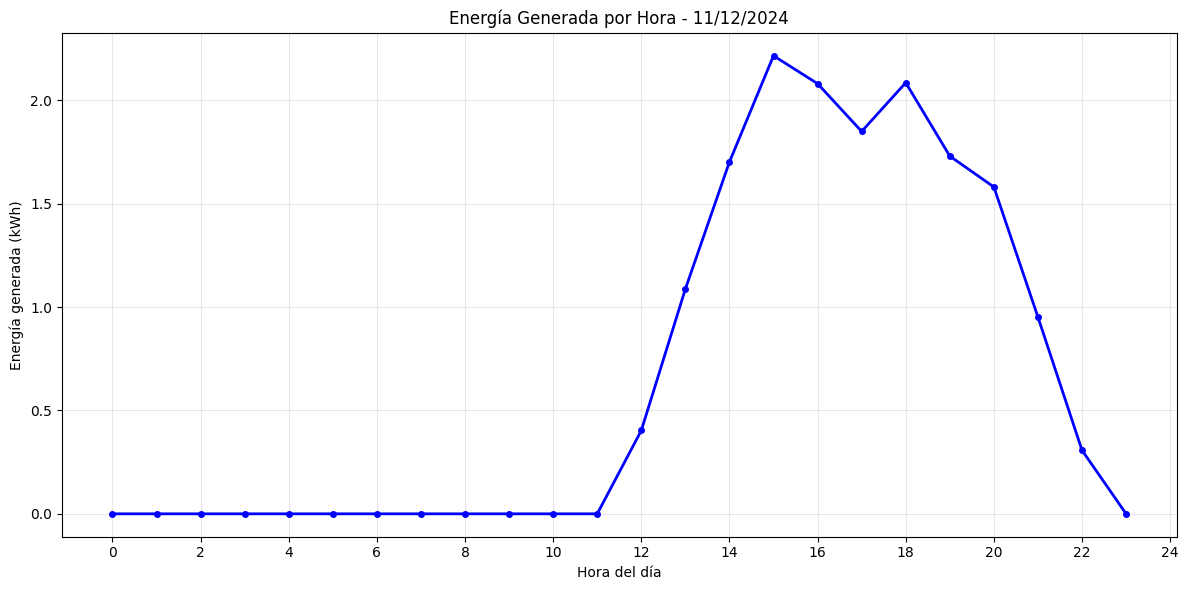


Test 2: Configuración diferente
Cargando datos del archivo: GHI_Temp_Daily_Hourly_2024.csv
Registros cargados: 8785
Temperatura promedio: 28.84°C
Radiación solar máxima (GHI): 1015.00 W/m²
Tamaño del archivo: (8785, 6)
Número total de filas: 8785
Número total de columnas: 6

Datos filtrados para 1/1/2024:
Registros encontrados: 24
Archivo filtered_data_2024_01_01.csv creado exitosamente

Modelado del sistema PV para 1/1/2024
Datos cargados: 24 registros
Variables extraídas:
Horas: 24 valores
Temperaturas: 24 valores
GHI: 24 valores

Paso 3: Parámetros del sistema:
Temperatura estándar: 25°C
Coeficiente de temperatura: -0.004
Área del panel: 1.65 m²
Eficiencia del panel: 20.0%
Número de paneles: 10
Área total del sistema: 16.5 m²
Eficiencia del inversor: 95.0%

Resultados de potencia:
Potencia DC máxima: 1989.65 W
Potencia AC máxima: 1890.16 W

Resultados finales:
Registros procesados: 24
Potencia promedio DC: 592.44 W
Potencia promedio AC: 562.82 W
Energía total generada: 13.51 kWh
Ar

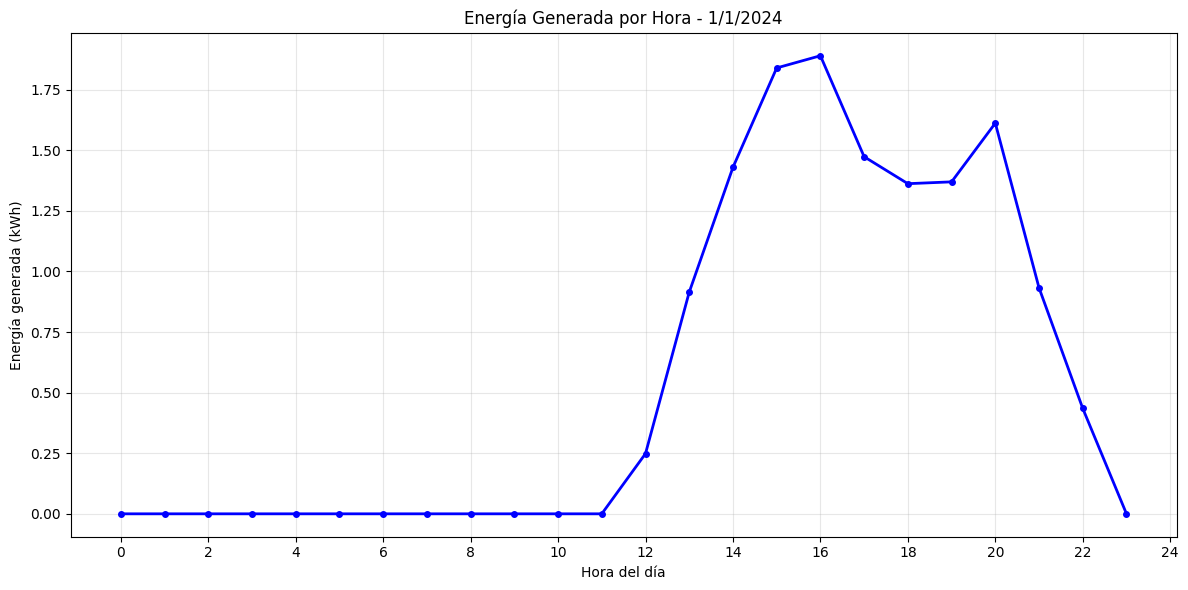

In [22]:
def energy_calculations(filepath, year, month, day, n_panels, panel_area, panel_efficiency, inverter_efficiency, stc_temp=25, temp_coeff=-0.004):
    """

    Parámetros:
    - filepath: archivo CSV original
    - year, month, day: fecha
    - n_panels: número de paneles
    - panel_area: área de cada panel en m²
    - panel_efficiency: eficiencia de los paneles
    - inverter_efficiency: eficiencia del inversor
    - stc_temp: temperatura estándar
    - temp_coeff: coeficiente de temperatura
    """
    try:
        # Generar archivos con nombres apropiados
        filtered_data_filename = f"filtered_data_{year}_{month:02d}_{day:02d}.csv"
        energy_data_filename = f"energy_data_{year}_{month:02d}_{day:02d}.csv"

        # Filtrar datos usando la función de la Parte 1
        filter_data_by_date(filepath, year, month, day)

        # Paso 1: Cargar datos filtrados
        ghi_temp_data = np.genfromtxt(filtered_data_filename, skip_header=True, delimiter=',')
        print(f"\nModelado del sistema PV para {day}/{month}/{year}")
        print(f"Datos cargados: {len(ghi_temp_data)} registros")

        # Paso 2: Extraer columnas específicas
        hours = ghi_temp_data[:, 3]        # Columna Hour
        temp = ghi_temp_data[:, 4]         # Columna Temperature
        ghi = ghi_temp_data[:, 5]          # Columna GHI

        print("Variables extraídas:")
        print(f"Horas: {len(hours)} valores")
        print(f"Temperaturas: {len(temp)} valores")
        print(f"GHI: {len(ghi)} valores")

        # Paso 3: Parámetros del sistema PV
        stc_temp = 25
        temp_coeff = -0.004
        total_area = panel_area * n_panels

        print(f"\nPaso 3: Parámetros del sistema:")
        print(f"Temperatura estándar: {stc_temp}°C")
        print(f"Coeficiente de temperatura: {temp_coeff}")
        print(f"Área del panel: {panel_area} m²")
        print(f"Eficiencia del panel: {panel_efficiency*100}%")
        print(f"Número de paneles: {n_panels}")
        print(f"Área total del sistema: {total_area} m²")
        print(f"Eficiencia del inversor: {inverter_efficiency*100}%")

        # Paso 4: Calcular corrección por temperatura
        temp_correction = 1 + temp_coeff * (temp - stc_temp)

        # Paso 5: Calcular potencia DC y AC
        dc_power = ghi * total_area * panel_efficiency * temp_correction
        ac_power = dc_power * inverter_efficiency

        print(f"\nResultados de potencia:")
        print(f"Potencia DC máxima: {np.max(dc_power):.2f} W")
        print(f"Potencia AC máxima: {np.max(ac_power):.2f} W")

        # Paso 6: Calcular energía
        hourly_energy_kwh = ac_power / 1000
        total_energy_kwh = np.sum(hourly_energy_kwh)

        # Crear archivo de datos de energía
        with open(energy_data_filename, 'w') as datafile:
            datafile.write("Hour,Power_DC,Power_AC,Energy_kWh\n")
            for i in range(len(hours)):
                datafile.write(f"{int(hours[i])},{dc_power[i]:.2f},{ac_power[i]:.2f},{hourly_energy_kwh[i]:.2f}\n")

        # Mensajes informativos finales
        print(f"\nResultados finales:")
        print(f"Registros procesados: {len(hours)}")
        print(f"Potencia promedio DC: {np.mean(dc_power):.2f} W")
        print(f"Potencia promedio AC: {np.mean(ac_power):.2f} W")
        print(f"Energía total generada: {total_energy_kwh:.2f} kWh")
        print(f"Archivo {energy_data_filename} creado exitosamente")

        # Bonus: Gráfica de energía generada
        plt.figure(figsize=(12, 6))
        plt.plot(hours, hourly_energy_kwh, 'b-', linewidth=2, marker='o', markersize=4)
        plt.title(f'Energía Generada por Hora - {day}/{month}/{year}')
        plt.xlabel('Hora del día')
        plt.ylabel('Energía generada (kWh)')
        plt.grid(True, alpha=0.3)
        plt.xticks(range(0, 25, 2))
        plt.tight_layout()

        # Guardar gráfica
        plot_filename = f"energy_plot_{year}_{month:02d}_{day:02d}.png"
        plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
        print(f"Gráfica guardada como: {plot_filename}")
        plt.show()

        return total_energy_kwh

    except FileNotFoundError:
        print(f"Error: No se encontró el archivo especificado")
    except Exception as e:
        print(f"Error inesperado: {e}")


if __name__ == "__main__":
    print("=== PARTE 2: MODELADO DE SISTEMA PV ===")
    print("-" * 40)

    # Archivo de datos
    data_file = "GHI_Temp_Daily_Hourly_2024.csv"

    # Paso 1: Cargar y explorar datos filtrados (usando Parte 1)
    print("Paso 1: Filtro de datos para 1 de enero de 2024")
    filter_data_by_date(data_file, 2024, 1, 1)

    # Cargar datos filtrados generados
    ghi_temp_data = np.genfromtxt("filtered_data_2024_01_01.csv", skip_header=True, delimiter=',')
    print(f"Datos filtrados: {ghi_temp_data.shape}")

    # Paso 2: Extraer columnas específicas
    hours = ghi_temp_data[:, 3]
    temp = ghi_temp_data[:, 4]
    ghi = ghi_temp_data[:, 5]

    print(f"Horas: {len(hours)} valores")
    print(f"Temperaturas: {len(temp)} valores")
    print(f"GHI: {len(ghi)} valores")

    # Paso 3: Constantes del sistema PV
    stc_temp = 25
    temp_coeff = -0.004
    panel_area = 1.65
    panel_efficiency = 0.2
    n_panels = 10
    total_area = panel_area * n_panels
    inverter_efficiency = 0.95

    print(f"\nConstantes del sistema:")
    print(f"Temperatura estándar: {stc_temp}°C")
    print(f"Coeficiente de temperatura: {temp_coeff}")
    print(f"Área del panel: {panel_area} m²")
    print(f"Eficiencia del panel: {panel_efficiency*100}%")
    print(f"Número de paneles: {n_panels}")
    print(f"Área total: {total_area} m²")
    print(f"Eficiencia del inversor: {inverter_efficiency*100}%")

    # Paso 4-6: Cálculos completos usando función
    print(f"\nCálculos del sistema...")

    # Paso 7-8: Probar función completa
    print(f"\nPaso 7-8: Pruebas de función completa")

    # Test requerido
    print("Test 1: 11 de diciembre de 2024")
    energy_calculations("GHI_Temp_Daily_Hourly_2024.csv", 2024, 12, 11,n_panels, panel_area, panel_efficiency,inverter_efficiency)

    print(f"\nTest 2: Configuración diferente")
    energy_calculations("GHI_Temp_Daily_Hourly_2024.csv", 2024, 1, 1,n_panels, panel_area, panel_efficiency,inverter_efficiency)
